In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
def DOA_to_ElAz(df):
    """
    Calculate elevation and azimuth angles from DOA vectors in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): DataFrame containing 'DOA_x', 'DOA_y', 'DOA_z' columns.

    Returns:
    pandas.DataFrame: The original DataFrame with added 'El.' and 'Az.' columns.
    """
    # Ensure the DOA components are present in the DataFrame
    required_columns = {'DOA_x', 'DOA_y', 'DOA_z'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame must contain the columns: {required_columns}")

    # Calculate elevation angle (El.)
    df['El.'] = 180.0 - np.degrees(np.arccos(df['DOA_z']))

    # Calculate azimuth angle (Az.)
    df['Az.'] = np.degrees(np.arctan2(df['DOA_y'], df['DOA_x']))

    # Optional: Ensure azimuth values are within [0, 360) degrees
    df['Az.'] = df['Az.'] % 360

    return df

           PeakTime   Amplitude     DOA_x     DOA_y     DOA_z   TDOA12  \
0  1699174862116960  102.912613  0.104321  0.737520  0.667219 -0.00023   
1  1699174863257580  112.275497  0.108575  0.739915  0.663880 -0.00023   
2  1699174863812610  107.805069  0.108575  0.739915  0.663880 -0.00023   
3  1699174878336910  102.698586  0.125785  0.726182  0.675898 -0.00028   
4  1699174878883960  103.624596  0.105791  0.751637  0.651037 -0.00022   

    TDOA13   TDOA14   TDOA23   TDOA24   TDOA34     Xcorr12     Xcorr13  \
0 -0.00069 -0.00027 -0.00045 -0.00004  0.00041  189.203964  227.570435   
1 -0.00069 -0.00027 -0.00045 -0.00004  0.00042  163.348083  207.655792   
2 -0.00069 -0.00027 -0.00045 -0.00004  0.00042  204.784943  181.747925   
3 -0.00068 -0.00026 -0.00046 -0.00004  0.00042  114.223045  187.592163   
4 -0.00068 -0.00026 -0.00046 -0.00004  0.00042  166.065308  137.515625   

      Xcorr14     Xcorr23     Xcorr24     Xcorr34         El.        Az.  
0  224.606812  192.144821  200.4468

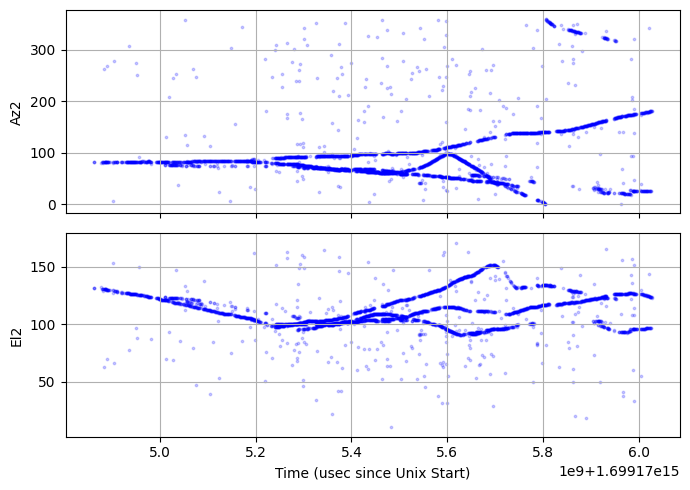

In [4]:


# Define the column names
"""
column_names = ["usec_since_Unix_Start", "Energy", "El.", "Az.", "TDOA12", "TDOA13", "TDOA14", 
                "TDOA23", "TDOA24", "TDOA34", "Xcorr12", "Xcorr13", "Xcorr14", 
                "Xcorr23", "Xcorr24", "Xcorr34"]
"""
column_names = [
    "PeakTime", "Amplitude", "DOA_x", "DOA_y", "DOA_z", "TDOA12", "TDOA13", "TDOA14",
    "TDOA23", "TDOA24", "TDOA34", "Xcorr12", "Xcorr13", "Xcorr14",
    "Xcorr23", "Xcorr24", "Xcorr34"
]
# Load the data with the specified column names
path_doa = "../../C/deployment_files/new_new.txt"
#df = pd.read_csv(path_doa, delim_whitespace=True, names=column_names, skiprows=1)
df = pd.read_csv(path_doa, sep=',', names=column_names, skiprows=1)
df = DOA_to_ElAz(df)
# Display the first few rows to verify
print(df.head())

# Create a figure with two subplots (one for Azimuth vs. Time, one for Elevation vs. Time)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

# Plot Azimuth vs. Time with transparency on the first subplot
azData = df["Az."]
elData = df["El."]


ax1.scatter(df["PeakTime"], azData, marker='o', s=3, color='b', alpha=0.2)
ax1.set_ylabel("Az2")
ax1.grid(True)

# Plot Elevation vs. Time with transparency on the second subplot

ax2.scatter(df["PeakTime"], elData, marker='o', s=3, color='b', alpha=0.2)
ax2.set_xlabel("Time (usec since Unix Start)")
ax2.set_ylabel("El2")
ax2.grid(True)

# Adjust the layout to ensure no overlapping and display the plot
plt.tight_layout()

# Extract the base path from the file path and create the output file path
base_path = os.path.splitext(path_doa.split('/')[-1])[0]  # Remove file extension
output_path = base_path + "_raw.png"  # Append desired file name extension
    
# Save the figure to the output path
plt.savefig(output_path, dpi=300)
print(f"Plot saved to {output_path}")
plt.show()
